In [5]:
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_table('./election_data.txt',delim_whitespace = True)

In [18]:
df1 = df.ix[1:]

,t,VP,VC,I,DPER,DUR,WAR,G,P,Z
1,1880,49.780,na,-1,0,-1.75,0,3.879,1.974,9
2,1884,50.154,na,-1,0,-2.00,0,1.589,1.055,2
3,1888,50.414,na,1,1,0.00,0,-5.553,0.604,3
4,1892,51.732,na,-1,-1,0.00,0,2.763,2.274,7
5,1896,47.760,48.081,1,0,0.00,0,-10.024,3.410,6
6,1900,46.829,46.604,-1,-1,0.00,0,-1.425,2.548,7
7,1904,39.994,43.659,-1,-1,-1.00,0,-2.421,1.442,5
8,1908,45.517,48.107,-1,0,-1.25,0,-6.281,1.879,8
9,1912,45.292,57.111,-1,-1,-1.50,0,4.164,2.172,8
10,1916,51.682,48.881,1,1,0.00,0,2.229,4.252,3


In [27]:
df1['P'] = pd.to_numeric(df1['P'])
df1['Z'] = pd.to_numeric(df1['Z'])

//anaconda/envs/py3_nlp/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/py3_nlp/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 1 to 34
Data columns (total 10 columns):
t       34 non-null int64
VP      34 non-null float64
VC      34 non-null object
I       34 non-null int64
DPER    34 non-null int64
DUR     34 non-null float64
WAR     34 non-null int64
G       34 non-null float64
P       34 non-null float64
Z       34 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.7+ KB


100%|██████████| 10000/10000 [00:17<00:00, 567.74it/s]


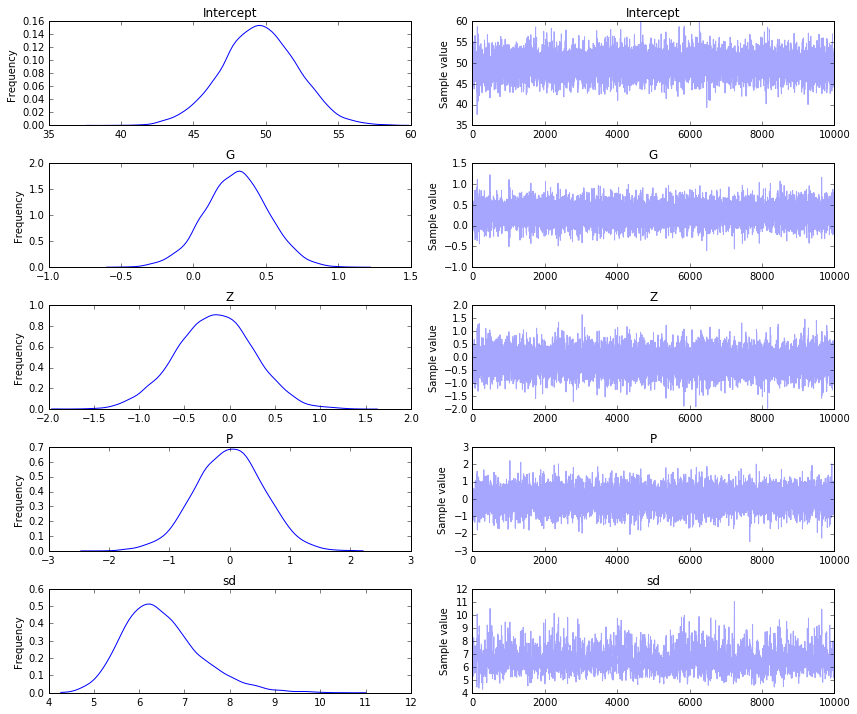

In [76]:
from pymc3.glm import glm

with Model() as model_glm:
    glm('VP ~ G + Z + P', df1)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = sample(10000, step, start, random_seed=123, progressbar = True)
    pm.traceplot(trace)

In [77]:
summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  49.563           2.612            0.033            [44.302, 54.521]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  44.382         47.822         49.550         51.321         54.652


G:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.297            0.220            0.002            [-0.145, 0.720]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.142         0.151          0.300          0.443          0.727


Z:

  Mean             SD               MC Error         95% HPD interval
  -------------------------

In [78]:
G = 0.97    
Z = 2
P = 1.42
VP = (0.297 * G) + (-0.162 * Z) + (0.0 * P) + 49.563
VP

49.52709

In [79]:
(VP/100) * 538

266.4557442

In [80]:
G = 0.87   
Z = 3
P = 1.28
VP = (0.297 * G) + (-0.162 * Z) + (0.0 * P) + 49.563
VP

49.335390000000004

In [107]:
from sklearn.linear_model import BayesianRidge

In [104]:
X = df1[['G', 'P','Z']].values
Y = df1[['VP']].values

In [105]:
X = np.concatenate((np.ones((X.shape[0], 1), dtype = X.dtype), X), axis = 1)
X

array([[  1.   ,   3.879,   1.974,   9.   ],
       [  1.   ,   1.589,   1.055,   2.   ],
       [  1.   ,  -5.553,   0.604,   3.   ],
       [  1.   ,   2.763,   2.274,   7.   ],
       [  1.   , -10.024,   3.41 ,   6.   ],
       [  1.   ,  -1.425,   2.548,   7.   ],
       [  1.   ,  -2.421,   1.442,   5.   ],
       [  1.   ,  -6.281,   1.879,   8.   ],
       [  1.   ,   4.164,   2.172,   8.   ],
       [  1.   ,   2.229,   4.252,   3.   ],
       [  1.   , -11.463,   0.   ,   0.   ],
       [  1.   ,  -3.872,   5.161,  10.   ],
       [  1.   ,   4.623,   0.183,   7.   ],
       [  1.   , -14.35 ,   6.928,   4.   ],
       [  1.   ,  11.682,   2.498,   9.   ],
       [  1.   ,   3.913,   0.051,   8.   ],
       [  1.   ,   4.122,   0.   ,   0.   ],
       [  1.   ,   3.214,   0.   ,   0.   ],
       [  1.   ,   0.997,   2.353,   7.   ],
       [  1.   ,  -1.252,   1.907,   5.   ],
       [  1.   ,   0.674,   1.98 ,   5.   ],
       [  1.   ,   5.03 ,   1.241,   9.   ],
       [  

In [110]:
clf = BayesianRidge(compute_score=True)
clf.fit(X, Y.ravel())

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [111]:
clf.predict([[1, 0.87, 1.28, 3]])

array([ 48.95762564])

In [112]:
(48.95762/100) * 538

263.3919956

In [115]:
pred_data = pd.read_table('./prediction.txt', delim_whitespace = True)

In [116]:
pred_data

,,,G,P,Z
November,"11,",2014,2.97,2.14,6
January,"31,",2015,3.04,1.86,3
April,"29,",2015,3.22,1.14,5
July,"31,",2015,3.03,1.33,3
October,"31,",2015,2.16,1.37,3
January,"30,",2016,1.97,1.37,3
April,"28,",2016,0.87,1.28,3
July,"29,",2016,0.94,1.40,2
October,"28,",2016,0.97,1.42,2


In [117]:
X_pred = pred_data[['G', 'P','Z']].values

In [119]:
X_pred = np.concatenate((np.ones((X_pred.shape[0], 1), dtype = X_pred.dtype), X_pred), axis = 1)
X_pred

array([[ 1.  ,  2.97,  2.14,  6.  ],
       [ 1.  ,  3.04,  1.86,  3.  ],
       [ 1.  ,  3.22,  1.14,  5.  ],
       [ 1.  ,  3.03,  1.33,  3.  ],
       [ 1.  ,  2.16,  1.37,  3.  ],
       [ 1.  ,  1.97,  1.37,  3.  ],
       [ 1.  ,  0.87,  1.28,  3.  ],
       [ 1.  ,  0.94,  1.4 ,  2.  ],
       [ 1.  ,  0.97,  1.42,  2.  ]])

In [121]:
dem_probs = clf.predict(X_pred)

In [122]:
(dem_probs/100) * 538

array([ 264.1023195 ,  264.22498459,  264.26195259,  264.23844921,
        263.8955554 ,  263.82095719,  263.39202595,  263.4442366 ,
        263.45535901])